# Functions

In [1]:
from tcc_markov_chain.base_simulation import Simulation
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from typing import List
from tcc_markov_chain.systems import HDPeriodic,DiskSystem
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# observables
from tcc_markov_chain.observables.hard_disk import particle_density, rdf

# Functions

In [3]:
class RDF():
    def __init__(
            self,
            box_size,
            n_bins=10,
        ):
        # self.system=system
        self.n_bins=n_bins
        self.bin_size = box_size / (2*n_bins)
        self.bins =np.zeros(n_bins+1)

    def eval(self, system:DiskSystem):
        distances = system.calculate_relative_positions()
        distances = np.linalg.norm(distances,axis=1)
        for d in distances:
            # print(d//self.bin_size, d, self.bin_size)
            if int(d//self.bin_size)==11:
                print(distances, system.positions)
            self.bins[int(d//self.bin_size)]+=2

        return True

In [ ]:
class ProbabilityDensityPosition():
    def __init__(self, sim:Simulation,bin_size=1):
        self.box_dimension = sim.system.box_dimension
        self.bin_size = bin_size
        self.n_bins = (self.box_dimension // bin_size).astype(int)
        self.bins = np.zeros(self.n_bins,dtype=float)
        self.steps = 0

    def evaluate(self,sys:DiskSystem):
        idx = (sys.positions[1] // self.bin_size).astype(int)
        self.bins[idx[0],idx[1]]+=1
        
        self.steps+=1
        return self.bins
    
    def normalize_results(self):
        return self.bins / self.steps

# Main

## Direct sampling - 2 particle problem

2025-07-16 23:36:24,389 - INFO - creting system with 2 particles of radii 0.65
2025-07-16 23:36:24,391 - INFO - density: 0.6636614480708438, box size [2. 2.]
2025-07-16 23:36:24,392 - INFO - system created


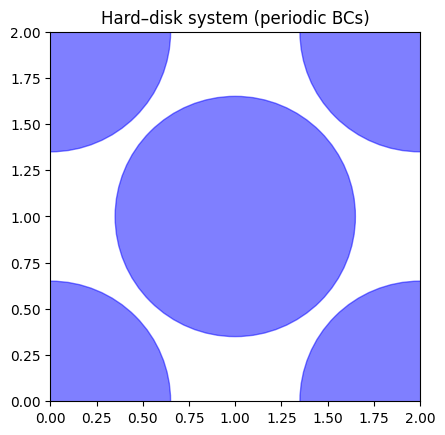

In [15]:
box_dimension=np.array([2,2],dtype=float)
n_particles=2
particle_radius=0.65
n_steps=int(1e3)
positions = np.array([[0,0],[1.,1]],dtype=float)
sys = HDPeriodic(particle_radius=particle_radius,n_particles=n_particles,positions=positions,box_dimension=box_dimension)
sys.plot_system()

In [20]:
sim = PeriodicDirectSampling(deepcopy(sys))
sim.system.positions
sim_pd = ProbabilityDensityPosition(sim,bin_size=2)
sim_run = sim.run(sim_pd.evaluate,n_steps=n_steps)

for step in sim_run:
    continue

[1 1]


  2%|▏         | 23/1000 [00:00<00:04, 228.62it/s]

[0 0] [[0.]]
[0 0] [[1.]]
[0 0] [[2.]]
[0 0] [[3.]]
[0 0] [[4.]]
[0 0] [[5.]]
[0 0] [[6.]]
[0 0] [[7.]]
[0 0] [[8.]]
[0 0] [[9.]]
[0 0] [[10.]]
[0 0] [[11.]]
[0 0] [[12.]]
[0 0] [[13.]]
[0 0] [[14.]]
[0 0] [[15.]]
[0 0] [[16.]]
[0 0] [[17.]]
[0 0] [[18.]]
[0 0] [[19.]]
[0 0] [[20.]]
[0 0] [[21.]]
[0 0] [[22.]]
[0 0] [[23.]]
[0 0] [[24.]]
[0 0] [[25.]]
[0 0] [[26.]]
[0 0] [[27.]]
[0 0] [[28.]]
[0 0] [[29.]]
[0 0] [[30.]]
[0 0] [[31.]]
[0 0] [[32.]]
[0 0] [[33.]]
[0 0] [[34.]]
[0 0] [[35.]]
[0 0] [[36.]]
[0 0] [[37.]]
[0 0] [[38.]]
[0 0] [[39.]]
[0 0] [[40.]]


  7%|▋         | 73/1000 [00:00<00:04, 196.72it/s]

[0 0] [[41.]]
[0 0] [[42.]]
[0 0] [[43.]]
[0 0] [[44.]]
[0 0] [[45.]]
[0 0] [[46.]]
[0 0] [[47.]]
[0 0] [[48.]]
[0 0] [[49.]]
[0 0] [[50.]]
[0 0] [[51.]]
[0 0] [[52.]]
[0 0] [[53.]]
[0 0] [[54.]]
[0 0] [[55.]]
[0 0] [[56.]]
[0 0] [[57.]]
[0 0] [[58.]]
[0 0] [[59.]]
[0 0] [[60.]]
[0 0] [[61.]]
[0 0] [[62.]]
[0 0] [[63.]]
[0 0] [[64.]]
[0 0] [[65.]]
[0 0] [[66.]]
[0 0] [[67.]]
[0 0] [[68.]]
[0 0] [[69.]]
[0 0] [[70.]]
[0 0] [[71.]]
[0 0] [[72.]]
[0 0] [[73.]]
[0 0] [[74.]]
[0 0] [[75.]]
[0 0] [[76.]]
[0 0] [[77.]]
[0 0] [[78.]]
[0 0] [[79.]]
[0 0] [[80.]]
[0 0] [[81.]]
[0 0] [[82.]]
[0 0] [[83.]]
[0 0] [[84.]]
[0 0] [[85.]]
[0 0] [[86.]]
[0 0] [[87.]]
[0 0] [[88.]]
[0 0] [[89.]]
[0 0] [[90.]]
[0 0] [[91.]]
[0 0] [[92.]]
[0 0] [[93.]]
[0 0] [[94.]]
[0 0] [[95.]]
[0 0] [[96.]]
[0 0] [[97.]]
[0 0] [[98.]]


 10%|█         | 100/1000 [00:00<00:04, 220.07it/s]

[0 0] [[99.]]
[0 0] [[100.]]
[0 0] [[101.]]
[0 0] [[102.]]
[0 0] [[103.]]
[0 0] [[104.]]
[0 0] [[105.]]
[0 0] [[106.]]
[0 0] [[107.]]
[0 0] [[108.]]
[0 0] [[109.]]
[0 0] [[110.]]
[0 0] [[111.]]
[0 0] [[112.]]
[0 0] [[113.]]
[0 0] [[114.]]
[0 0] [[115.]]
[0 0] [[116.]]
[0 0] [[117.]]
[0 0] [[118.]]
[0 0] [[119.]]
[0 0] [[120.]]
[0 0] [[121.]]
[0 0] [[122.]]


 12%|█▏        | 123/1000 [00:00<00:04, 180.55it/s]

[0 0] [[123.]]
[0 0] [[124.]]
[0 0] [[125.]]
[0 0] [[126.]]
[0 0] [[127.]]
[0 0] [[128.]]
[0 0] [[129.]]


 17%|█▋        | 169/1000 [00:00<00:04, 197.08it/s]

[0 0] [[130.]]
[0 0] [[131.]]
[0 0] [[132.]]
[0 0] [[133.]]
[0 0] [[134.]]
[0 0] [[135.]]
[0 0] [[136.]]
[0 0] [[137.]]
[0 0] [[138.]]
[0 0] [[139.]]
[0 0] [[140.]]
[0 0] [[141.]]
[0 0] [[142.]]
[0 0] [[143.]]
[0 0] [[144.]]
[0 0] [[145.]]
[0 0] [[146.]]
[0 0] [[147.]]
[0 0] [[148.]]
[0 0] [[149.]]
[0 0] [[150.]]
[0 0] [[151.]]
[0 0] [[152.]]
[0 0] [[153.]]
[0 0] [[154.]]
[0 0] [[155.]]
[0 0] [[156.]]
[0 0] [[157.]]
[0 0] [[158.]]
[0 0] [[159.]]
[0 0] [[160.]]
[0 0] [[161.]]
[0 0] [[162.]]
[0 0] [[163.]]
[0 0] [[164.]]
[0 0] [[165.]]
[0 0] [[166.]]
[0 0] [[167.]]
[0 0] [[168.]]
[0 0] [[169.]]
[0 0] [[170.]]
[0 0] [[171.]]


 21%|██        | 210/1000 [00:01<00:04, 183.08it/s]

[0 0] [[172.]]
[0 0] [[173.]]
[0 0] [[174.]]
[0 0] [[175.]]
[0 0] [[176.]]
[0 0] [[177.]]
[0 0] [[178.]]
[0 0] [[179.]]
[0 0] [[180.]]
[0 0] [[181.]]
[0 0] [[182.]]
[0 0] [[183.]]
[0 0] [[184.]]
[0 0] [[185.]]
[0 0] [[186.]]
[0 0] [[187.]]
[0 0] [[188.]]
[0 0] [[189.]]
[0 0] [[190.]]
[0 0] [[191.]]
[0 0] [[192.]]
[0 0] [[193.]]
[0 0] [[194.]]
[0 0] [[195.]]
[0 0] [[196.]]
[0 0] [[197.]]
[0 0] [[198.]]
[0 0] [[199.]]
[0 0] [[200.]]
[0 0] [[201.]]
[0 0] [[202.]]
[0 0] [[203.]]
[0 0] [[204.]]
[0 0] [[205.]]
[0 0] [[206.]]
[0 0] [[207.]]
[0 0] [[208.]]
[0 0] [[209.]]
[0 0] [[210.]]
[0 0] [[211.]]
[0 0] [[212.]]
[0 0]

 26%|██▌       | 257/1000 [00:01<00:03, 194.31it/s]

 [[213.]]
[0 0] [[214.]]
[0 0] [[215.]]
[0 0] [[216.]]
[0 0] [[217.]]
[0 0] [[218.]]
[0 0] [[219.]]
[0 0] [[220.]]
[0 0] [[221.]]
[0 0] [[222.]]
[0 0] [[223.]]
[0 0] [[224.]]
[0 0] [[225.]]
[0 0] [[226.]]
[0 0] [[227.]]
[0 0] [[228.]]
[0 0] [[229.]]
[0 0] [[230.]]
[0 0] [[231.]]
[0 0] [[232.]]
[0 0] [[233.]]
[0 0] [[234.]]
[0 0] [[235.]]
[0 0] [[236.]]
[0 0] [[237.]]
[0 0] [[238.]]
[0 0] [[239.]]
[0 0] [[240.]]
[0 0] [[241.]]
[0 0] [[242.]]
[0 0] [[243.]]
[0 0] [[244.]]
[0 0] [[245.]]
[0 0] [[246.]]
[0 0] [[247.]]
[0 0] [[248.]]
[0 0] [[249.]]
[0 0] [[250.]]
[0 0] [[251.]]
[0 0] [[252.]]
[0 0] [[253.]]
[0 0] [[254.]]
[0 0] [[255.]]
[0 0] [[256.]]
[0 0] [[257.]]
[0 0] [[258.]]


 28%|██▊       | 277/1000 [00:01<00:03, 184.02it/s]

[0 0] [[259.]]
[0 0] [[260.]]
[0 0] [[261.]]
[0 0] [[262.]]
[0 0] [[263.]]
[0 0] [[264.]]
[0 0] [[265.]]
[0 0] [[266.]]
[0 0] [[267.]]
[0 0] [[268.]]
[0 0] [[269.]]
[0 0] [[270.]]
[0 0] [[271.]]
[0 0] [[272.]]
[0 0] [[273.]]
[0 0] [[274.]]
[0 0] [[275.]]
[0 0] [[276.]]
[0 0] [[277.]]
[0 0] [[278.]]
[0 0] [[279.]]
[0 0] [[280.]]
[0 0] [[281.]]
[0 0] [[282.]]
[0 0] [[283.]]
[0 0] [[284.]]
[0 0] [[285.]]
[0 0] [[286.]]
[0 0] [[287.]]
[0 0] [[288.]]
[0 0] [[289.]]
[0 0] [[290.]]
[0 0] [[291.]]
[0 0] [[292.]]
[0 0] [[293.]]
[0 0] [[294.]]
[0 0] [[295.]]
[0 0] [[296.]]
[0 0] [[297.]]
[0 0] [[298.]]
[0 0] [[299.]]
[0 0] [[300.]]
[0 0] [[301.]]
[0 0] [[302.]]
[0 0] [[303.]]
[0 0] [[304.]]
[0 0] [[305.]]


 33%|███▎      | 328/1000 [00:01<00:03, 193.99it/s]

[0 0] [[306.]]
[0 0] [[307.]]
[0 0] [[308.]]
[0 0] [[309.]]
[0 0] [[310.]]
[0 0] [[311.]]
[0 0] [[312.]]
[0 0] [[313.]]
[0 0] [[314.]]
[0 0] [[315.]]
[0 0] [[316.]]
[0 0] [[317.]]
[0 0] [[318.]]
[0 0] [[319.]]
[0 0] [[320.]]
[0 0] [[321.]]
[0 0] [[322.]]
[0 0] [[323.]]
[0 0] [[324.]]
[0 0] [[325.]]
[0 0] [[326.]]
[0 0] [[327.]]
[0 0] [[328.]]
[0 0] [[329.]]
[0 0] [[330.]]
[0 0] [[331.]]
[0 0] [[332.]]
[0 0] [[333.]]
[0 0] [[334.]]
[0 0] [[335.]]
[0 0] [[336.]]
[0 0] [[337.]]
[0 0] [[338.]]
[0 0] [[339.]]
[0 0] [[340.]]
[0 0] [[341.]]
[0 0] [[342.]]
[0 0] [[343.]]
[0 0] [[344.]]
[0 0] [[345.]]


 37%|███▋      | 374/1000 [00:01<00:03, 199.32it/s]

[0 0] [[346.]]
[0 0] [[347.]]
[0 0] [[348.]]
[0 0] [[349.]]
[0 0] [[350.]]
[0 0] [[351.]]
[0 0] [[352.]]
[0 0] [[353.]]
[0 0] [[354.]]
[0 0] [[355.]]
[0 0] [[356.]]
[0 0] [[357.]]
[0 0] [[358.]]
[0 0] [[359.]]
[0 0] [[360.]]
[0 0] [[361.]]
[0 0] [[362.]]
[0 0] [[363.]]
[0 0] [[364.]]
[0 0] [[365.]]
[0 0] [[366.]]
[0 0] [[367.]]
[0 0] [[368.]]
[0 0] [[369.]]
[0 0] [[370.]]
[0 0] [[371.]]
[0 0] [[372.]]
[0 0] [[373.]]
[0 0] [[374.]]
[0 0] [[375.]]
[0 0] [[376.]]
[0 0] [[377.]]
[0 0] [[378.]]
[0 0] [[379.]]
[0 0] [[380.]]
[0 0] [[381.]]
[0 0] [[382.]]
[0 0] [[383.]]
[0 0] [[384.]]
[0 0] [[385.]]


 42%|████▏     | 417/1000 [00:02<00:03, 186.32it/s]

[0 0] [[386.]]
[0 0] [[387.]]
[0 0] [[388.]]
[0 0] [[389.]]
[0 0] [[390.]]
[0 0] [[391.]]
[0 0] [[392.]]
[0 0] [[393.]]
[0 0] [[394.]]
[0 0] [[395.]]
[0 0] [[396.]]
[0 0] [[397.]]
[0 0] [[398.]]
[0 0] [[399.]]
[0 0] [[400.]]
[0 0] [[401.]]
[0 0] [[402.]]
[0 0] [[403.]]
[0 0] [[404.]]
[0 0] [[405.]]
[0 0] [[406.]]
[0 0] [[407.]]
[0 0] [[408.]]
[0 0] [[409.]]
[0 0] [[410.]]
[0 0] [[411.]]
[0 0] [[412.]]
[0 0] [[413.]]
[0 0] [[414.]]
[0 0] [[415.]]
[0 0] [[416.]]
[0 0] [[417.]]
[0 0] [[418.]]
[0 0] [[419.]]
[0 0] [[420.]]
[0 0] [[421.]]
[0 0] [[422.]]
[0 0] [[423.]]
[0 0] [[424.]]
[0 0] [[425.]]
[0 0] [[426.]]
[0 0] [[427.]]
[0 0] [[428.]]
[0 0] [[429.]]
[0 0] [[430.]]
[0 0] [[431.]]
[0 0] [[432.]]
[0 0] [[433.]]
[0 0] [[434.]]
[0 0] [[435.]]
[0 0] [[436.]]
[0 0] [[437.]]
[0 0] [[438.]]


 48%|████▊     | 479/1000 [00:02<00:03, 173.52it/s]

[0 0] [[439.]]
[0 0] [[440.]]
[0 0] [[441.]]
[0 0] [[442.]]
[0 0] [[443.]]
[0 0] [[444.]]
[0 0] [[445.]]
[0 0] [[446.]]
[0 0] [[447.]]
[0 0] [[448.]]
[0 0] [[449.]]
[0 0] [[450.]]
[0 0] [[451.]]
[0 0] [[452.]]
[0 0] [[453.]]
[0 0] [[454.]]
[0 0] [[455.]]
[0 0] [[456.]]
[0 0] [[457.]]
[0 0] [[458.]]
[0 0] [[459.]]
[0 0] [[460.]]
[0 0] [[461.]]
[0 0] [[462.]]
[0 0] [[463.]]
[0 0] [[464.]]
[0 0] [[465.]]
[0 0] [[466.]]
[0 0] [[467.]]
[0 0] [[468.]]
[0 0] [[469.]]
[0 0] [[470.]]
[0 0] [[471.]]
[0 0] [[472.]]
[0 0] [[473.]]
[0 0] [[474.]]
[0 0] [[475.]]
[0 0] [[476.]]
[0 0] [[477.]]
[0 0] [[478.]]


 54%|█████▍    | 538/1000 [00:17<01:13,  6.28it/s] 

[0 0] [[479.]]
[0 0] [[480.]]
[0 0] [[481.]]
[0 0] [[482.]]
[0 0] [[483.]]
[0 0] [[484.]]
[0 0] [[485.]]
[0 0] [[486.]]
[0 0] [[487.]]
[0 0] [[488.]]
[0 0] [[489.]]
[0 0] [[490.]]
[0 0] [[491.]]
[0 0] [[492.]]
[0 0] [[493.]]
[0 0] [[494.]]
[0 0] [[495.]]
[0 0] [[496.]]
[0 0] [[497.]]
[0 0] [[498.]]
[0 0] [[499.]]
[0 0] [[500.]]
[0 0] [[501.]]
[0 0] [[502.]]
[0 0] [[503.]]
[0 0] [[504.]]
[0 0] [[505.]]
[0 0] [[506.]]
[0 0] [[507.]]
[0 0] [[508.]]
[0 0] [[509.]]
[0 0] [[510.]]
[0 0] [[511.]]
[0 0] [[512.]]
[0 0] [[513.]]
[0 0] [[514.]]
[0 0] [[515.]]
[0 0] [[516.]]
[0 0] [[517.]]
[0 0] [[518.]]
[0 0] [[519.]]
[0 0] [[520.]]
[0 0] [[521.]]
[0 0] [[522.]]
[0 0] [[523.]]
[0 0] [[524.]]
[0 0] [[525.]]
[0 0] [[526.]]
[0 0] [[527.]]
[0 0] [[528.]]
[0 0] [[529.]]
[0 0] [[530.]]
[0 0] [[531.]]
[0 0] [[532.]]
[0 0] [[533.]]
[0 0] [[534.]]
[0 0] [[535.]]
[0 0] [[536.]]
[0 0] [[537.]]
[0 0] [[538.]]
[0 0] [[539.]]
[0 0] [[540.]]
[0 0] [[541.]]
[0 0] [[542.]]
[0 0] [[543.]]
[0 0] [[544.]]
[0 0] [[54

100%|██████████| 1000/1000 [00:05<00:00, 199.17it/s]

[0 0] [[972.]]
[0 0] [[973.]]
[0 0] [[974.]]
[0 0] [[975.]]
[0 0] [[976.]]
[0 0] [[977.]]
[0 0] [[978.]]
[0 0] [[979.]]
[0 0] [[980.]]
[0 0] [[981.]]
[0 0] [[982.]]
[0 0] [[983.]]
[0 0] [[984.]]
[0 0] [[985.]]
[0 0] [[986.]]
[0 0] [[987.]]
[0 0] [[988.]]
[0 0] [[989.]]
[0 0] [[990.]]
[0 0] [[991.]]
[0 0] [[992.]]
[0 0] [[993.]]
[0 0] [[994.]]
[0 0] [[995.]]
[0 0] [[996.]]
[0 0] [[997.]]
[0 0] [[998.]]
[0 0] [[999.]]


In [ ]:
hist = sim_pd.normalize_results()
print(hist.mean())
print(hist.std())

0.04
0.006026607669327745


In [ ]:
hist.round(3)

array([[0.046, 0.038, 0.045, 0.036, 0.041],
       [0.048, 0.031, 0.044, 0.047, 0.04 ],
       [0.039, 0.042, 0.039, 0.038, 0.026],
       [0.024, 0.036, 0.045, 0.04 , 0.043],
       [0.046, 0.04 , 0.048, 0.038, 0.04 ]])

## Markov Chain/Direct sampling Probabilitie density

2025-07-16 23:06:11,748 - INFO - creting system with 4 particles of radii 1
2025-07-16 23:06:11,749 - INFO - density: 0.5026548245743669, box size [5 5]
2025-07-16 23:06:11,750 - INFO - system created


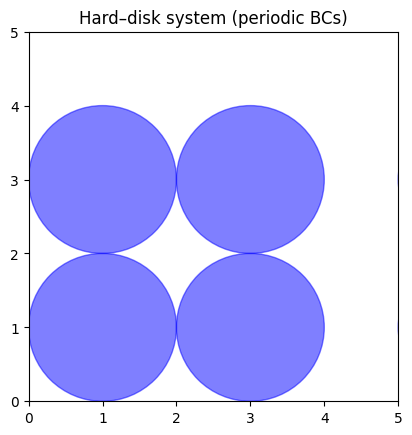

In [ ]:
#Defining system
box_size=5
n_particles=4
particle_radius=1
sys = HDPeriodic(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles,fast_initial=True)
sys.plot_system()

In [ ]:
def run_simulation(sim,n_steps):
    evaluator = ProbabilityDensityPosition(sim,n_bins=10)
    sim_run = sim.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
    for step in sim_run:
        continue
    hist = evaluator.normalize_results()
    print(hist.mean())
    print(hist.std())
    


In [ ]:
#defining markov chain simualtion
n_steps=int(1e6)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=10*particle_radius)
run_simulation(sim_mc,n_steps)

 15%|█▍        | 147194/1000000 [00:02<00:13, 65026.65it/s]


KeyboardInterrupt: 

In [ ]:
x,y = sys.rng.integers(0,[10,5],2)
x,y

(np.int64(5), np.int64(2))

In [ ]:
test = np.array([10,20])
r = 1
test // (2*r)

array([ 5, 10])

In [ ]:
sys.rng.uniform(0,2,2)

array([0.45447744, 1.10916957])

In [ ]:
sys.rng.uniform([10,0],np.array([40,20]),2)

array([11.91451768, 16.55262344])

In [ ]:
np.array([2,3])**2

array([4, 9])

In [ ]:
# Defining direct sampling simulations
n_steps=int(1e3)
sim_ds = PeriodicDirectSampling(system=deepcopy(sys))
run_simulation(sim_ds,n_steps)

100%|██████████| 1000/1000 [00:12<00:00, 82.09it/s]

0.01
0.0030659419433511784


In [ ]:
[1,2]<1

TypeError: '<' not supported between instances of 'list' and 'int'

### Phase transition

In [ ]:
box_size = 10
particle_radius=0.6
n_particles=20
n_steps = int(1e5)
n_bins=int(50)

sys = HardDiskSystem(box_size=box_size, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)

bin_size = sim_mc.sys.box_size / (2*n_bins)
bins = np.linspace(0, sim.sys.box_size/2, n_bins + 1)
for step in sim_mc.run(eval_fn=lambda x: rdf(x,n_bins=n_bins),n_steps=n_steps):
    bins+=step

#ploting
density = n_particles / (box_size ** 2)
bins_centers = (np.linspace(0, sim.sys.box_size/2, n_bins + 1) * bin_size) + (bin_size / 2)
bins_normalization = (2 * np.pi * bins_centers * bin_size * density * n_particles * n_steps)
bins /= bins_normalization
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(bins_centers, bins, linestyle='-')

NameError: name 'HardDiskSystem' is not defined